# 02-Lab_25-07-2025

## Linear Regression

### DataSet Used :- Cars Dataset

#### Setup Section

In [1]:
pip install pandas scikit-learn matplotlib

  Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached matplotlib-3.10.5-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Usin

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Dharshan Raj P A\\College\\Laboratory\\Advanced_Predictive_Analytics_Laboratory\\.venv\\Lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp313-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

#### Usage Of CSV Dataset

In [4]:
# Load the real-world car dataset
df = pd.read_csv('Dataset/cars.csv')

#### Data Cleaning & Preprocessing

In [5]:
# Clean ‘Ex-Showroom_Price’ → numeric, remove “Rs.” & commas
df['Price'] = df['Ex-Showroom_Price'] \
    .str.replace(r'[^0-9]', '', regex=True) \
    .astype(float)

# Clean ‘Displacement’ → numeric (drop “ cc”)
df['Displacement'] = df['Displacement'] \
    .str.replace(' cc', '', regex=False) \
    .astype(float)

print("Dataset shape:", df.shape)
print(df[['Make','Model','Price','Displacement']].head())

# Select features & inspect missingness
features = [
    'Cylinders', 'Valves_Per_Cylinder', 'Doors',
    'Seating_Capacity', 'Number_of_Airbags',
    'USB_Ports', 'Displacement'
]
target = 'Price'

print("Missing values per column:")
print(df[features + [target]].isnull().sum())

# Drop rows with any missing values in our selected columns
df_clean = df.dropna(subset=features + [target]).reset_index(drop=True)
print("After dropna, shape:", df_clean.shape)

Dataset shape: (1276, 141)
   Make      Model     Price  Displacement
0  Tata  Nano Genx  292667.0         624.0
1  Tata  Nano Genx  236447.0         624.0
2  Tata  Nano Genx  296661.0         624.0
3  Tata  Nano Genx  334768.0         624.0
4  Tata  Nano Genx  272223.0         624.0
Missing values per column:
Cylinders                66
Valves_Per_Cylinder     102
Doors                     4
Seating_Capacity          6
Number_of_Airbags       135
USB_Ports              1247
Displacement             12
Price                     0
dtype: int64
After dropna, shape: (29, 141)


#### Splitting the Dataset

In [6]:
from sklearn.model_selection import train_test_split

X = df_clean[features]
y = df_clean[target]

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 23
Testing samples: 6


#### Building the Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model intercept:", model.intercept_)
print("Model coefficients:", dict(zip(features, model.coef_)))


Model intercept: -57006849.53714605
Model coefficients: {'Cylinders': np.float64(7308925.774101532), 'Valves_Per_Cylinder': np.float64(1.766566128935665e-07), 'Doors': np.float64(10282666.146869142), 'Seating_Capacity': np.float64(-4827027.155995175), 'Number_of_Airbags': np.float64(-784451.2844937558), 'USB_Ports': np.float64(-12587862.84926465), 'Displacement': np.float64(18302.938825798385)}


#### Model Evaluation

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:,.2f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 227,770,920,448,573.03
R-squared: -4.4011


#### Predictions & Visualization

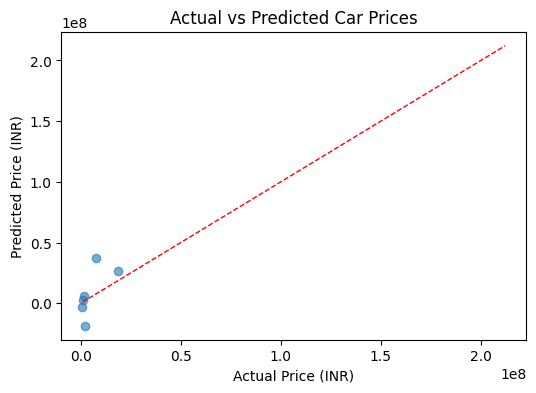

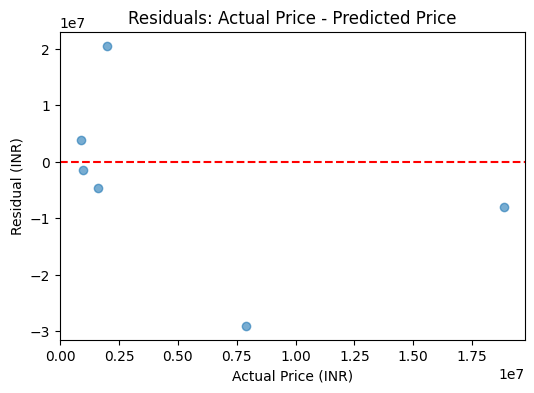

Predicted Price: 180222.60715977848


c:\Dharshan Raj P A\College\Laboratory\Advanced_Predictive_Analytics_Laboratory\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 6.1 Actual vs Predicted Scatter
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=1)
plt.xlabel("Actual Price (INR)")
plt.ylabel("Predicted Price (INR)")
plt.title("Actual vs Predicted Car Prices")
plt.show()

# 6.2 Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Price (INR)")
plt.ylabel("Residual (INR)")
plt.title("Residuals: Actual Price - Predicted Price")
plt.show()

# 6.3 Predicting New Sample
new_sample = [[
    4,    # Cylinders
    4,    # Valves_Per_Cylinder
    5,    # Doors
    5,    # Seating_Capacity
    2,    # Number_of_Airbags
    2,    # USB_Ports
    1498  # Displacement
]]
pred_price = model.predict(new_sample)
print("Predicted Price:", pred_price[0])

